In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

In [28]:
data = pd.read_csv('Clustering_gmm.csv')

In [29]:
data.head(10)

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
5,61.577160,168.091751
6,63.341866,170.642516
7,61.041643,170.096682
8,62.633623,171.862972
9,53.407860,162.756843


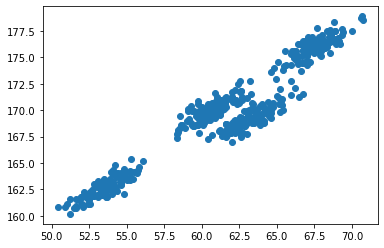

In [30]:
x = data.iloc[:,1:3]
plt.scatter(data['Weight'],data['Height'])
plt.show()

In [31]:
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.60, random_state=0)
X = X[:, ::-1]

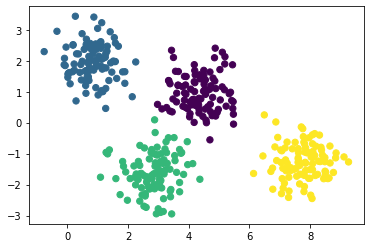

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.show()

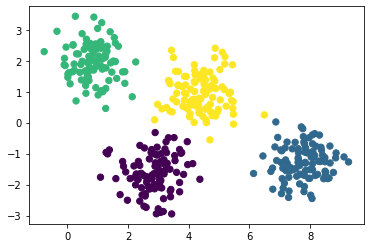

In [33]:
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

In [34]:
def draw_ellipse(position,covariance,**kwargs):
    ax = plt.gca()
    if covariance.shape == (2,2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width,height = 2* np.sqrt(s)
    else:
        angle =0 
        width,height = 2*np.sqrt(covariance)
        
    for n in range(1,4):
        ax.add_patch(Ellipse(position,n*width,n*height,angle, **kwargs))

def plot_gmm(gmm, X, label=True):
    ax = plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

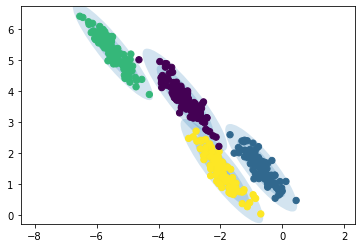

In [35]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
plot_gmm(gmm, X_stretched)